In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
generator = np.random.default_rng()

In [2]:
df = pd.read_csv("dataset3.csv")
df = df.drop('Unnamed: 0', axis=1)

df.head()

,price,stock,sigma,strike,maturity,initial_vol,theta,interest_rates
0,0.295504,2.016174,0.5,1.6,1.5,0.01,0.02,0.0
1,0.000000,1.942285,0.5,1.6,1.5,0.01,0.02,0.0
2,0.299618,2.009134,0.5,1.6,1.5,0.01,0.02,0.0
3,0.506532,1.995661,0.5,1.6,1.5,0.01,0.02,0.0
4,0.226201,1.981438,0.5,1.6,1.5,0.01,0.02,0.0


## Classification

In [3]:
df['exercise'] = df.price!=0
df = df.drop(['price', 'interest_rates'], axis=1)
df.head()

,stock,sigma,strike,maturity,initial_vol,theta,exercise
0,2.016174,0.5,1.6,1.5,0.01,0.02,True
1,1.942285,0.5,1.6,1.5,0.01,0.02,False
2,2.009134,0.5,1.6,1.5,0.01,0.02,True
3,1.995661,0.5,1.6,1.5,0.01,0.02,True
4,1.981438,0.5,1.6,1.5,0.01,0.02,True


In [4]:
df.groupby('exercise').count().stock

exercise
False     79136
True     136864
Name: stock, dtype: int64

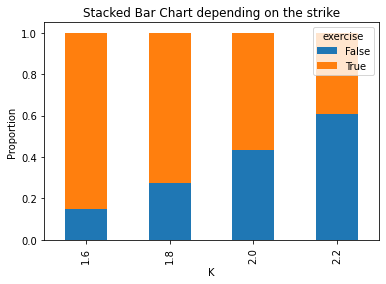

In [5]:
table = pd.crosstab(df.strike, df.exercise)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart depending on the strike')
plt.xlabel('K')
plt.ylabel('Proportion')
plt.savefig('e_vs_ne_strike')

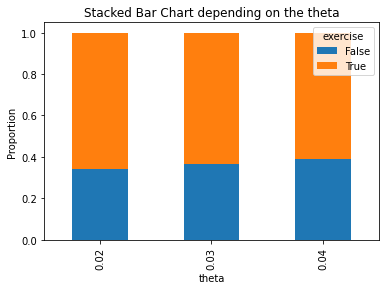

In [9]:
table = pd.crosstab(df.theta, df.exercise)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart depending on the theta')
plt.xlabel('theta')
plt.ylabel('Proportion')
plt.savefig('e_vs_ne_theta')

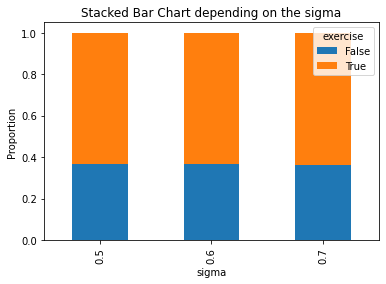

In [10]:
table = pd.crosstab(df.sigma, df.exercise)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart depending on the sigma')
plt.xlabel('sigma')
plt.ylabel('Proportion')
plt.savefig('e_vs_ne_sigma')

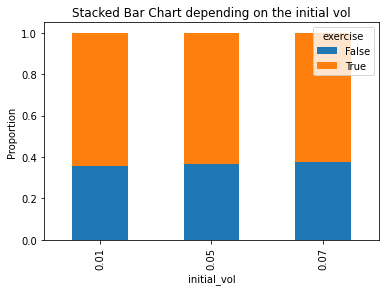

In [11]:
table = pd.crosstab(df.initial_vol, df.exercise)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart depending on the initial vol')
plt.xlabel('initial_vol')
plt.ylabel('Proportion')
plt.savefig('e_vs_ne_initial_vole')

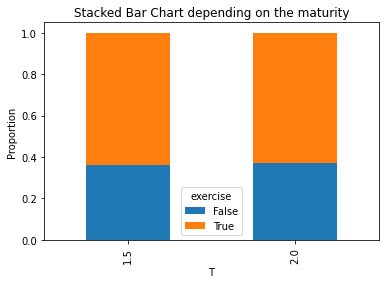

In [12]:
table = pd.crosstab(df.maturity, df.exercise)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart depending on the maturity')
plt.xlabel('T')
plt.ylabel('Proportion')
plt.savefig('e_vs_ne_strike')

In [13]:
# plot function confusion matrix

from sklearn.metrics import confusion_matrix
def plot_confusion_matrix (confusion_matrix, title):

    ax = plt.subplot()
    sns.heatmap(confusion_matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1, linecolor = "w", cmap = "Pastel2")
    ax.set_xlabel('True labels')
    ax.set_ylabel('Predicted labels')
    ax.xaxis.set_ticklabels(['Exercised','Not Exercised'])
    ax.yaxis.set_ticklabels(['Exercised','Not Exercised'], va="center")
    plt.title(title)
    plt.show()

In [14]:
# plot function roc curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(X_test, y_test, y_pred, model, title):
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    titlee = 'Exercise ROC curve ' + title
    plt.title(titlee)
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [15]:
X = df.drop('exercise', axis = 1)
y = df['exercise']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Logistic Regression

In [16]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.582824
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.113      
Dependent Variable: exercise         AIC:              251791.9222
Date:               2020-12-07 08:26 BIC:              251853.6204
No. Observations:   216000           Log-Likelihood:   -1.2589e+05
Df Model:           5                LL-Null:          -1.4191e+05
Df Residuals:       215994           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------
stock           3.9314   0.0314  125.0614 0.0000   3.8698   3.9930
sigma           0.2049   0.0573    3.5771 0.0003   0.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred = logreg.predict(X_test)

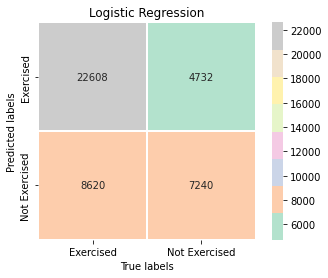

In [19]:
confusion_matrix_logistic = confusion_matrix(y_test, y_pred, labels=[True, False])
plot_confusion_matrix (confusion_matrix_logistic, 'Logistic Regression')

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.60      0.46      0.52     15860
        True       0.72      0.83      0.77     27340

    accuracy                           0.69     43200
   macro avg       0.66      0.64      0.65     43200
weighted avg       0.68      0.69      0.68     43200



In [21]:
print('Accuracy logistic regression classifier: {:.2f}%'.format(logreg.score(X_test, y_test)*100))

Accuracy logistic regression classifier: 69.09%


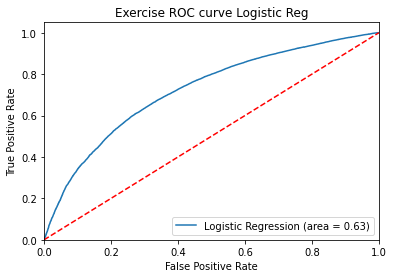

In [ ]:
plot_roc_curve(X_test, y_test, y_pred, logreg, 'Logistic Reg')

In [44]:
importance = logreg.coef_
indices = np.argsort(importance)[::-1]

# Print the feature ranking
print("Feature ranking:")

for i in range(len(X.columns)):
    print(f"{X.columns[i]} feature: {list(importance)[0][i]}") 


Feature ranking:
stock feature: 3.6847292287960896
sigma feature: 0.14199823580656248
strike feature: -3.6488764885210645
maturity feature: -0.052940855815175734
initial_vol feature: -1.0927450954877778
theta feature: -8.204932131573972


## KNN

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

Neighbor_List=[3,5,10,20]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
classifier_knn = GridSearchCV(KNNC, parameters, cv=5, verbose=0, scoring ='accuracy')

classifier_knn.fit(X_train, y_train)
y_pred = classifier_knn.predict(X_test)

In [47]:
print('Accuracy KNN: {:.2f}%'.format(logreg.score(X_test, y_test)*100))

Accuracy KNN: 68.97%


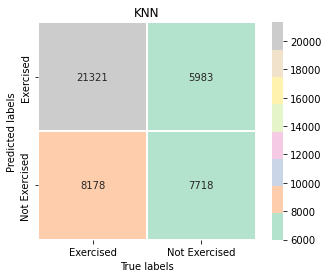

In [48]:
confusion_matrix_knn = confusion_matrix(y_test, y_pred, labels=[True, False])
plot_confusion_matrix (confusion_matrix_knn, 'KNN')

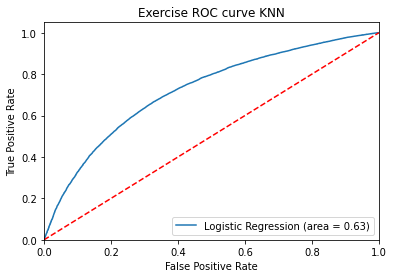

In [49]:
plot_roc_curve(X_test, y_test, y_pred, classifier_knn, 'KNN')

## XGBoost

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [52]:
from xgboost import XGBClassifier

params = {
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 6],
    'learning_rate': [0.005, 0.01, 0.02],
    'subsample': [0.4, 0.8]
}
classifier_xgboost = GridSearchCV(XGBClassifier(random_state=10), params, scoring ='accuracy')
classifier_xgboost.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=10, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.005, 0.01, 0.02],
                         'max_depth': [3, 6], 'n_estimators': [100, 200, 400],
                         'subsa

In [53]:
y_pred = classifier_xgboost.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy XGBoost: %.2f%%" % (accuracy * 100.0))

Accuracy XGBoost: 69.14%


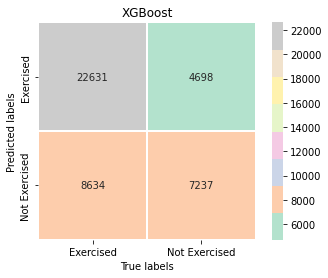

In [55]:
confusion_matrix_knn = confusion_matrix(y_test, y_pred, labels=[True, False])
plot_confusion_matrix (confusion_matrix_knn, 'XGBoost')

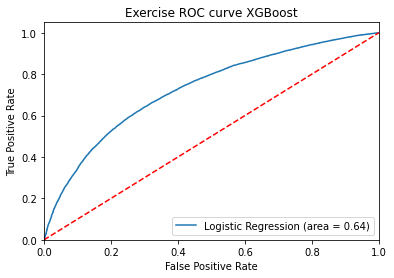

In [56]:
plot_roc_curve(X_test, y_test, y_pred, classifier_xgboost, 'XGBoost')

Feature ranking:
1. feature 2 (0.809639)
2. feature 0 (0.190361)
3. feature 5 (0.000000)
4. feature 4 (0.000000)
5. feature 3 (0.000000)
6. feature 1 (0.000000)


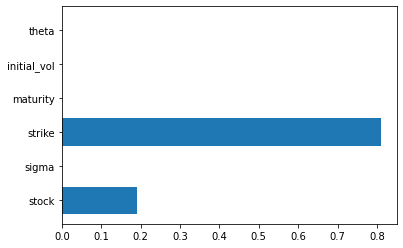

In [57]:
# feature importance

clf= XGBClassifier(learning_rate= 0.005, max_depth= 2, n_estimators= 100, subsample= 0.6,random_state=10)
clf.fit(X_train, y_train)
features = X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.barh(X.columns, clf.feature_importances_)
plt.show()